### 1. Import thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### 2. Load dữ liệu

In [2]:
df = pd.read_csv("../data/raw/text.csv")

### 3. Data exploration

In [3]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(686)

In [8]:
emotion_map = {
  0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
df['emotion'] = df['label'].map(emotion_map)
df.head()

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [9]:
df['text_length'] = df['text'].apply(len)
df.head()

,text,label,emotion,text_length
0,i just feel really helpless and heavy hearted,4,fear,45
1,ive enjoyed being able to slouch about relax a...,0,sadness,234
2,i gave up my internship with the dmrg and am f...,4,fear,63
3,i dont know i feel so lost,0,sadness,26
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222


#### 3.1. Phân phối độ dài văn bản

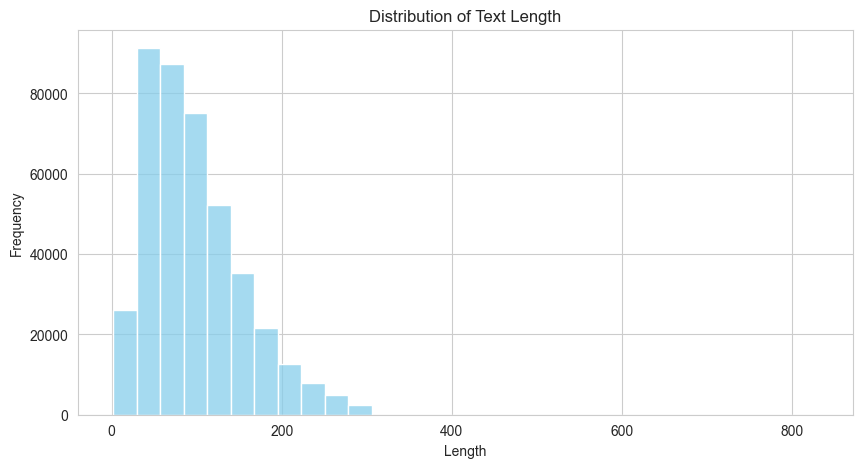

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, color='skyblue')
plt.title('Distribution of Text Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

#### 3.2. Phân phối nhãn

Text(0.5, 1.0, 'Distribution of Emotions')

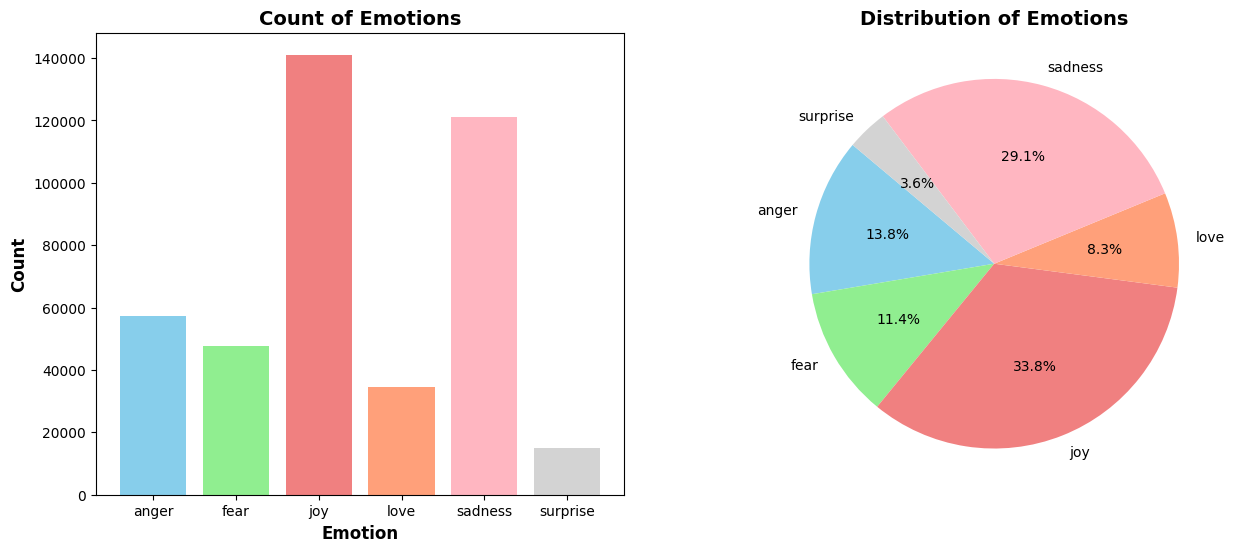

In [11]:
plt.style.use('default')
sns.set_palette("husl")

label_counts = df['emotion'].value_counts()
labels = sorted(label_counts.keys())
counts = [label_counts[label] for label in labels]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(labels, counts, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray'])
axes[0].set_xlabel('Emotion', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Count of Emotions', fontsize=14, fontweight='bold')

axes[1].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray'])
axes[1].set_title('Distribution of Emotions', fontsize=14, fontweight='bold')

#### 3.3. Phân tích từ thường gặp theo emotion

In [12]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Phân tích từ thường gặp theo emotion
def analyze_word_frequency(text_series):
    all_words = ' '.join(text_series).split()
    filtered_words = [word for word in all_words if word.lower() not in stop_words and len(word) > 2]
    word_freq = Counter(filtered_words)
    return word_freq.most_common(20)

for emotion in df['emotion'].unique():
    emotion_texts = df[df['emotion'] == emotion]['text']
    common_words = analyze_word_frequency(emotion_texts)
    print(f"Top words for {emotion}: {common_words[:10]}")

[nltk_data] Downloading package stopwords to C:\Users\TRAN QUOC
[nltk_data]     HUY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words for fear: [('feel', 30913), ('feeling', 17673), ('like', 6260), ('little', 3518), ('know', 3040), ('really', 2800), ('bit', 2424), ('time', 2418), ('still', 2390), ('get', 2204)]
Top words for sadness: [('feel', 84184), ('feeling', 40849), ('like', 22167), ('really', 7533), ('know', 7183), ('time', 6133), ('little', 5719), ('get', 5410), ('ive', 5172), ('would', 5035)]
Top words for love: [('feel', 24463), ('feeling', 10303), ('like', 7558), ('love', 2365), ('really', 2247), ('know', 2077), ('people', 1705), ('would', 1694), ('time', 1690), ('one', 1680)]
Top words for joy: [('feel', 102709), ('feeling', 40953), ('like', 25245), ('really', 8506), ('time', 7323), ('know', 7159), ('get', 6523), ('would', 5916), ('people', 5794), ('one', 5666)]
Top words for surprise: [('feel', 9953), ('feeling', 5171), ('like', 2375), ('amazed', 1415), ('impressed', 1414), ('weird', 1413), ('strange', 1400), ('overwhelmed', 1391), ('surprised', 1389), ('amazing', 1370)]
Top words for anger: [('

#### 4. Dữ liệu sau khi xử lý

In [10]:
norm_df = pd.read_csv("../data/processed/train.csv")

In [11]:
emotion_map = {
	0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}
norm_df['emotion'] = norm_df['label'].map(emotion_map)
norm_df.head()

,text,label,emotion
0,i spoke on the phone with my mother yesterday ...,2,love
1,i have a problem with someone or im arguing i ...,1,joy
2,i feel overwhelmed when i think of a country s...,5,surprise
3,i have still in me though i feel hesitant to o...,4,fear
4,i feel so funny with it but i dont know everyt...,5,surprise


In [12]:
norm_df.describe()

,label
count,59553.000000
mean,2.499975
std,1.707869
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


Text(0.5, 1.0, 'Distribution of Emotions')

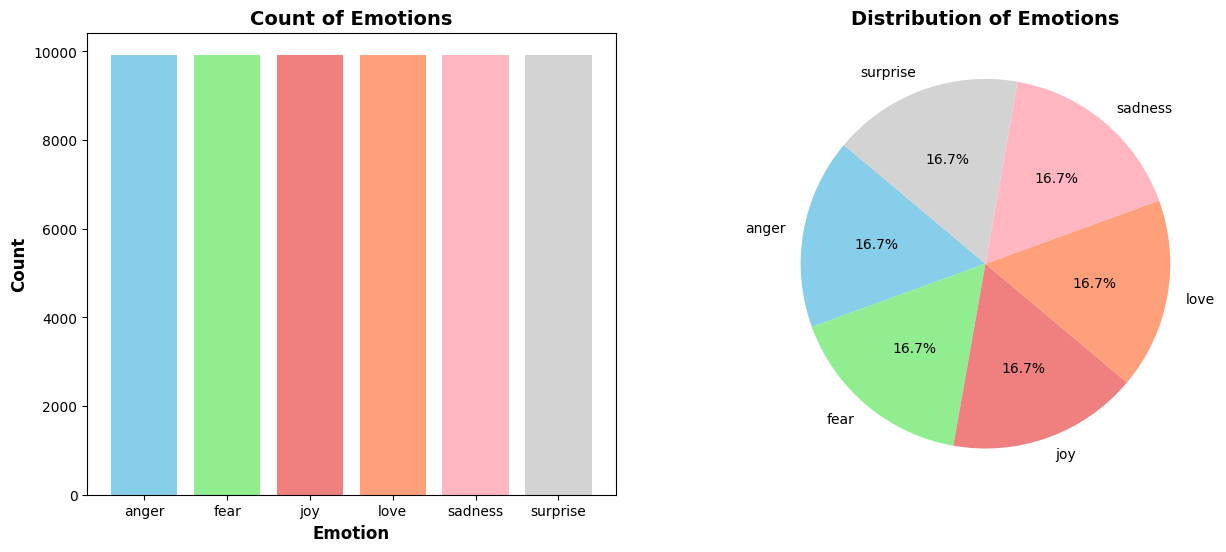

In [13]:
plt.style.use('default')
sns.set_palette("husl")

label_counts = norm_df['emotion'].value_counts()
labels = sorted(label_counts.keys())
counts = [label_counts[label] for label in labels]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(labels, counts, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray'])
axes[0].set_xlabel('Emotion', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Count of Emotions', fontsize=14, fontweight='bold')

axes[1].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightgray'])
axes[1].set_title('Distribution of Emotions', fontsize=14, fontweight='bold')